In [9]:
# In this notebook, we explore the llc contention impact by fixing the traffic input rate

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import causallearn
import re

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from matplotlib.ticker import FuncFormatter

In [11]:
import pandas as pd

# Path to your CSV file
csv_file = '..\\datasets\\ONVM-nDPI-stats_0xf.csv'

# Read the CSV file
df = pd.read_csv(csv_file, header=[0, 1])
print(df.columns)

MultiIndex([(                             'Unnamed: 0_level_0', ...),
            (                 'ndpi_stats-pcm_new_System-Date', ...),
            (                 'ndpi_stats-pcm_new_System-Time', ...),
            (               'ndpi_stats-pcm_new_Socket 0-EXEC', ...),
            (                'ndpi_stats-pcm_new_Socket 0-IPC', ...),
            (               'ndpi_stats-pcm_new_Socket 0-FREQ', ...),
            (              'ndpi_stats-pcm_new_Socket 0-AFREQ', ...),
            (             'ndpi_stats-pcm_new_Socket 0-L3MISS', ...),
            (             'ndpi_stats-pcm_new_Socket 0-L2MISS', ...),
            (              'ndpi_stats-pcm_new_Socket 0-L3HIT', ...),
            (              'ndpi_stats-pcm_new_Socket 0-L2HIT', ...),
            (              'ndpi_stats-pcm_new_Socket 0-L3MPI', ...),
            (              'ndpi_stats-pcm_new_Socket 0-L2MPI', ...),
            (              'ndpi_stats-pcm_new_Socket 0-L3OCC', ...),
            (       

# cache sensitive

In [12]:
exp_ls = f'0x10'

In [13]:
def extract_specific_data(exp_ls):
    file_path = f'..\\data\\ONVM-nDPI-stats\\{exp_ls}\\traffic_profile.txt'
    
    # Regular expression patterns for required data
    tx_pattern = r"\[Device: id=0\] TX: ([\d.]+)"
    rx_pattern = r"\[Device: id=1\] RX: ([\d.]+)"
    stddev_rx_pattern = r"\[Device: id=1\] RX: [\d.]+ \(StdDev ([\d.]+)\)"  # Adjusted pattern
    average_pattern = r"Average: ([\d.]+) ns"

    # Variables to store the extracted data
    tx_value, rx_value, stddev_rx, average = None, None, None, None

    # Read the text file
    with open(file_path, 'r') as file:
        for line in file:
            if tx_match := re.search(tx_pattern, line):
                tx_value = round(float(tx_match.group(1)), 2)
            elif rx_match := re.search(rx_pattern, line):
                rx_value = round(float(rx_match.group(1)), 2)
            elif stddev_rx_match := re.search(stddev_rx_pattern, line):
                stddev_rx = round(float(stddev_rx_match.group(1)), 2)
            elif average_match := re.search(average_pattern, line):
                average = round(float(average_match.group(1)), 2)

    return tx_value, rx_value, average



# Usage example
input_file_path = f'..\\data\\ONVM-nDPI-stats\\{exp_ls}\\traffic_profile.txt'
data =  extract_specific_data(f'0x10')
print(data)


(5.66, 4.78, 7420799.4)


In [14]:
# compare for different LLC ways: exp0x1, 0x3,0xf,0xfffff

input_rate = [extract_specific_data(f'0x10')[0], extract_specific_data(f'0x3')[0], extract_specific_data(f'0xf')[0], extract_specific_data(f'0xfffff')[0] ]
output_rate = [extract_specific_data(f'0x10')[1], extract_specific_data(f'0x3')[1], extract_specific_data(f'0xf')[1], extract_specific_data(f'0xfffff')[1]]
latency = [extract_specific_data(f'0x10')[2], extract_specific_data(f'0x3')[2], extract_specific_data(f'0xf')[2], extract_specific_data(f'0xfffff')[2]]

print(input_rate)
print(output_rate)
print(latency)

[5.66, 5.65, 5.49, 5.59]
[4.78, 5.43, 5.42, 5.51]
[7420799.4, 1313955.1, 11137.8, 12144.5]


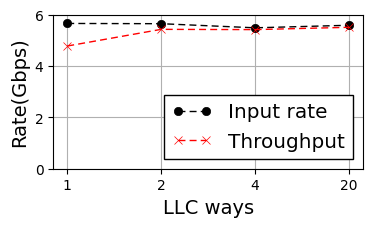

In [15]:
fig, ax = plt.subplots(facecolor='white', figsize=(4,2))
plt.style.use('classic')
xx = ["1","2","4","20"]
ax.plot(xx,input_rate, marker='o', markersize=6, c='k', linewidth=1, dashes=(5, 3), label="Input rate")
ax.plot(xx, output_rate, marker='x', markersize=6, c='r', linestyle='-', linewidth=1, dashes=(5, 3), label='Throughput')
ax.legend(loc='lower right')
ax.set_ylim([0,6])
ax.set_xlabel(f'LLC ways', size='14')
ax.set_ylabel('Rate(Gbps)', size='14')
ax.grid()
#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_throughput.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

In [16]:
print(latency)

[7420799.4, 1313955.1, 11137.8, 12144.5]


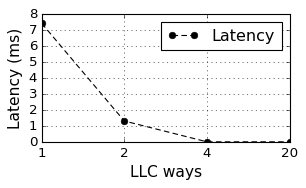

In [17]:
fig, ax = plt.subplots(facecolor='white', figsize=(4,2))
plt.style.use('classic')
xx = ["1","2","4","20"]
#xx=[1,2,4,20]
ax.plot(xx,[i/1000000 for i in latency], marker='o', markersize=6, c='k', linestyle='-', linewidth=1, dashes=(5, 3), label="Latency")
ax.set_xlabel(f'LLC ways', size='14')
ax.set_ylabel("Latency (ms)", size='14')
ax.legend(loc='upper right')
#ax.set_ylim([0,6])
ax.grid()
#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_latency.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

In [18]:
# compare for same LLC ways under different location: exp0x1, 0x3,0xf,0xfffff

input_rate = [extract_specific_data(f'0x10')[0], extract_specific_data(f'0x1')[0], extract_specific_data(f'0x10000')[0], extract_specific_data(f'0x2')[0] ]
output_rate = [extract_specific_data(f'0x10')[1], extract_specific_data(f'0x1')[1], extract_specific_data(f'0x10000')[1], extract_specific_data(f'0x2')[1]]
latency = [extract_specific_data(f'0x10')[2], extract_specific_data(f'0x1')[2], extract_specific_data(f'0x10000')[2], extract_specific_data(f'0x2')[2]]

print(input_rate)
print(output_rate)
print(latency)

[5.66, 5.63, 5.65, 5.64]
[4.78, 4.78, 4.76, 4.71]
[7420799.4, 7319947.4, 7276230.2, 7479633.3]


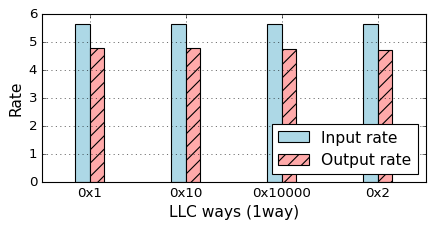

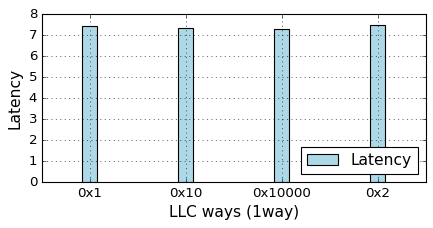

In [19]:
import matplotlib.pyplot as plt

# Assuming your extract_specific_data function and input data are defined as before
color_input = 'lightblue'
color_output = '#FFAAAA'


input_rate = [extract_specific_data(f'0x10')[0], extract_specific_data(f'0x1')[0], extract_specific_data(f'0x10000')[0], extract_specific_data(f'0x2')[0] ]
output_rate = [extract_specific_data(f'0x10')[1], extract_specific_data(f'0x1')[1], extract_specific_data(f'0x10000')[1], extract_specific_data(f'0x2')[1]]
latency = [extract_specific_data(f'0x10')[2], extract_specific_data(f'0x1')[2], extract_specific_data(f'0x10000')[2], extract_specific_data(f'0x2')[2]]

# First plot for input and output rates
fig, ax = plt.subplots(facecolor='white', figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
xx = ["0x1","0x10","0x10000","0x2"]
bar_width = 0.15  # Width of the bars
index = range(len(xx))
# Set the width of the bars
bar_width = 0.15

# Calculate the positions for the bars on the x-axis
x_pos_scale = 0.7
x_pos = [x * x_pos_scale for x in range(len(input_rate))]
x_pos_input_rate = [x - bar_width/2 for x in x_pos]
x_pos_output_rate = [x + bar_width/2 for x in x_pos]
# Creating bar plots
ax.bar([i - bar_width/2 for i in index], input_rate, bar_width,  label="Input rate", color=color_input)
ax.bar([i + bar_width/2 for i in index], output_rate, bar_width, label='Output rate', color=color_output, hatch='//', edgecolor="black")

ax.legend(loc='lower right', fontsize=14)
ax.set_ylim([0, 6])
ax.set_xlabel('LLC ways (1way)', size='14')
ax.set_ylabel('Rate', size='14')
ax.set_xticks(index)
ax.set_xticklabels(xx)
ax.grid()

#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_throughput_1way.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

# Second plot for latency
fig, ax = plt.subplots(facecolor='white', figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
ax.bar(index, [i/1000000 for i in latency], bar_width, color=color_input, label="Latency")

ax.set_xlabel('LLC ways (1way)', size='14')
ax.set_ylabel("Latency", size='14')
ax.legend(loc='lower right', fontsize=14)
#ax.set_ylim([0, 10])
ax.set_xticks(index)
ax.set_xticklabels(xx)
ax.grid()

#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_latency_1way.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()


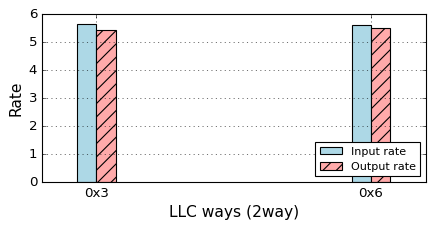

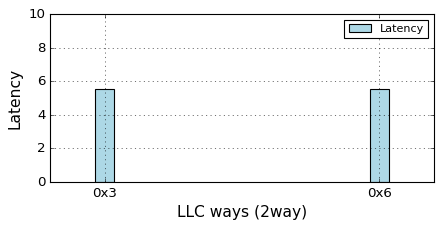

In [20]:
import matplotlib.pyplot as plt

# Assuming your extract_specific_data function and input data are defined as before
color_input = 'lightblue'
color_output = '#FFAAAA'


input_rate = [extract_specific_data(f'0x3')[0], extract_specific_data(f'0x6')[0]]
output_rate = [extract_specific_data(f'0x3')[1], extract_specific_data(f'0x6')[1]]
latency = [extract_specific_data(f'0x6')[2], extract_specific_data(f'0x6')[2]]

# First plot for input and output rates
fig, ax = plt.subplots(facecolor='white', figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
xx = ["0x3", "0x6"]
bar_width = 0.07  # Width of the bars
index = range(len(xx))

# Creating bar plots
ax.bar([i - bar_width/2 for i in index], input_rate, bar_width,  label="Input rate", color=color_input)
ax.bar([i + bar_width/2 for i in index], output_rate, bar_width, label='Output rate', color=color_output, hatch='//', edgecolor="black")

ax.legend(loc='lower right', fontsize=10)
ax.set_ylim([0, 6])
ax.set_xlabel('LLC ways (2way)', size='14')
ax.set_ylabel('Rate', size='14')
ax.set_xticks(index)
ax.set_xticklabels(xx)
ax.grid()
#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_throughput_2way.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()
# Second plot for latency
fig, ax = plt.subplots(facecolor='white', figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
ax.bar(index, [i/100000 for i in latency], bar_width, color=color_input, label="Latency")

ax.set_xlabel('LLC ways (2way)', size='14')
ax.set_ylabel("Latency", size='14')
ax.legend(loc='upper right', fontsize=10)
ax.set_ylim([0, 10])
ax.set_xticks(index)
ax.set_xticklabels(xx)
ax.grid()

#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_latency_2way.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()


# align throughput,latency,ways,input rate into csvfile

In [21]:
def hex_to_bin_count_ones(hex_str):
    # Remove the '0x' prefix and then convert from hexadecimal to integer
    num = int(hex_str, 16)
    # Convert the integer to a binary string, removing the '0b' prefix
    bin_str = bin(num)[2:]
    # Count the number of '1's in the binary string
    num_ones = bin_str.count('1')
    # Return the binary representation and the number of '1's
    return num_ones

# Examples
hex_str_1 = "0x10"
num_ones_1 = hex_to_bin_count_ones(hex_str_1)
print(f"{hex_str_1}, containing {num_ones_1} '1's")

hex_str_2 = "0x7ff"
num_ones_2 = hex_to_bin_count_ones(hex_str_2)
print(f"{hex_str_2}, containing {num_ones_2} '1's")



0x10, containing 1 '1's
0x7ff, containing 11 '1's


In [22]:
def extract_specific_data(exp_ls):
    file_path = f'..\\data\\ONVM-nDPI-stats\\{exp_ls}\\traffic_profile.txt'
    
    # Regular expression patterns for required data
    tx_pattern = r"\[Device: id=0\] TX: ([\d.]+)"
    rx_pattern = r"\[Device: id=1\] RX: ([\d.]+)"
    stddev_rx_pattern = r"\[Device: id=1\] RX: [\d.]+ \(StdDev ([\d.]+)\)"  # Adjusted pattern
    average_pattern = r"Average: ([\d.]+) ns"

    # Variables to store the extracted data
    tx_value, rx_value, stddev_rx, average = None, None, None, None

    # Read the text file
    with open(file_path, 'r') as file:
        for line in file:
            if tx_match := re.search(tx_pattern, line):
                tx_value = round(float(tx_match.group(1)), 2)
            elif rx_match := re.search(rx_pattern, line):
                rx_value = round(float(rx_match.group(1)), 2)
            elif stddev_rx_match := re.search(stddev_rx_pattern, line):
                stddev_rx = round(float(stddev_rx_match.group(1)), 2)
            elif average_match := re.search(average_pattern, line):
                average = round(float(average_match.group(1)), 2)

    return tx_value, rx_value, average



# Usage example
input_file_path = f'..\\data\\ONVM-nDPI-stats\\{exp_ls}\\traffic_profile.txt'
data =  extract_specific_data(f'0x10')
print(data)


(5.66, 4.78, 7420799.4)


In [23]:
exp_ls = f'0x10000'


In [24]:
import pandas as pd

a=hex_to_bin_count_ones(exp_ls)
tuple_feature = extract_specific_data(exp_ls)
b=tuple_feature[0]
c=tuple_feature[1]
d=tuple_feature[2]

#txt file

input_file_path =  f'..\\datasets\\ONVM-nDPI-stats_{exp_ls}.csv'
data = pd.read_csv(input_file_path )
num_rows= len(data["ndpi_stats-pcm_new_System-Date"])

data['llc-way'] = [a] * num_rows
data['input-rate'] = [b] * num_rows
data['throughput'] = [c] * num_rows
data['latency'] = [d] * num_rows

output_csv_path = f'..\\datasets\\ONVM-nDPI-stats_{exp_ls}_modify.csv'
data.to_csv(output_csv_path, index=False)

print(f"New columns added based on the first column's row count ({num_rows}) and saved to the CSV file successfully.")


New columns added based on the first column's row count (298) and saved to the CSV file successfully.


# sensitive feature

In [25]:
exp_ls = f'0x10'

In [26]:
import pandas as pd

def combine_csv_files(file_paths, output_file_path):
    dataframes = []
    
    # Iterate over the list of file paths and read each file into a DataFrame
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.to_csv(output_file_path, index=False)
    
    print(f"Combined CSV saved to {output_file_path}")

# Example usage
file_paths = [f'..\\datasets\\ONVM-nDPI-stats_0x3_modify.csv', f'..\\datasets\\ONVM-nDPI-stats_0x1_modify.csv',
              f'..\\datasets\\ONVM-nDPI-stats_0xf_modify.csv',f'..\\datasets\\ONVM-nDPI-stats_0x2_modify.csv',
             f'..\\datasets\\ONVM-nDPI-stats_0x6_modify.csv',f'..\\datasets\\ONVM-nDPI-stats_0x10_modify.csv',
             f'..\\datasets\\ONVM-nDPI-stats_0x10000_modify.csv',f'..\\datasets\\ONVM-nDPI-stats_0xfffff_modify.csv',]  # Replace these with your actual file paths
output_file_path = f'..\datasets\\combined_modify.csv'  # The path for the output combined CSV file
combine_csv_files(file_paths, output_file_path)


Combined CSV saved to ..\datasets\combined_modify.csv


In [27]:
exp_ls= "combined_modify.csv"
#exp_ls=f'..\\datasets\\ONVM-nDPI-stats_0x1.csv'
file_path =  f'..\\datasets\\{exp_ls}'
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 297
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ndpi_stats-pcm_new_System-Date                   2384 non-null   object 
 1   ndpi_stats-pcm_new_System-Time                   2384 non-null   object 
 2   ndpi_stats-pcm_new_Socket 0-EXEC                 2384 non-null   float64
 3   ndpi_stats-pcm_new_Socket 0-IPC                  2384 non-null   float64
 4   ndpi_stats-pcm_new_Socket 0-FREQ                 2384 non-null   float64
 5   ndpi_stats-pcm_new_Socket 0-AFREQ                2384 non-null   float64
 6   ndpi_stats-pcm_new_Socket 0-L3MISS               2384 non-null   float64
 7   ndpi_stats-pcm_new_Socket 0-L2MISS               2384 non-null   float64
 8   ndpi_stats-pcm_new_Socket 0-L3HIT                2384 non-null   float64
 9   ndpi_stats-pcm_new_Socket 0-L2H

C:\Users\Qiong\AppData\Local\Temp\ipykernel_32732\2632171634.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


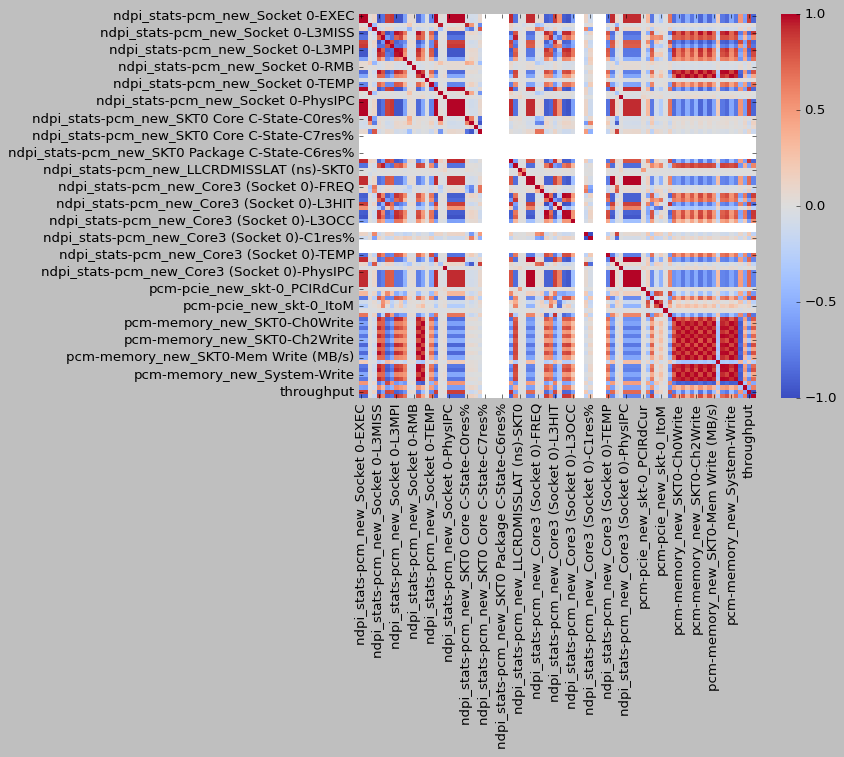

In [28]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")

plt.show()

In [29]:
data['throughput']

Unnamed: 0
0      5.43
1      5.43
2      5.43
3      5.43
4      5.43
       ... 
293    5.51
294    5.51
295    5.51
296    5.51
297    5.51
Name: throughput, Length: 2384, dtype: float64

C:\Users\Qiong\AppData\Local\Temp\ipykernel_32732\2968205862.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations = data.corr()['llc-way'].sort_values(ascending=False)


correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-L3HIT: 0.8217136671840862
correlationship between llc-way and ndpi_stats-pcm_new_Core3 (Socket 0)-L3HIT: 0.604587478009727
correlationship between llc-way and pcm-pcie_new_skt-0_WiL: 0.5866124386992063
correlationship between llc-way and throughput: 0.5288683647440711
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-INSTnom: 0.5209338073331707
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-IPC: 0.5206270436896536
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-PhysIPC: 0.520264418201108
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-PhysIPC%: 0.5202373888505006
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-INSTnom%: 0.5196041235146255
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-EXEC: 0.5195862876723133
correlationship between llc-way and ndpi_stats-pcm_new_Socket 0-INST: 0.5195591540552849
correlationship between llc-way 

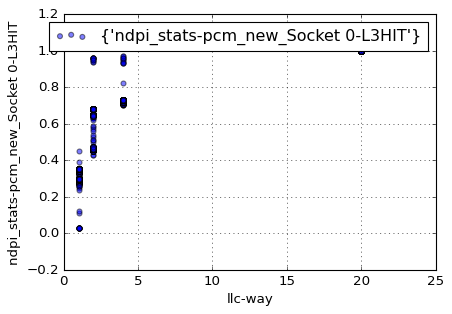

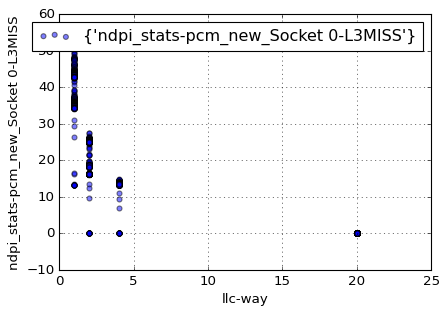

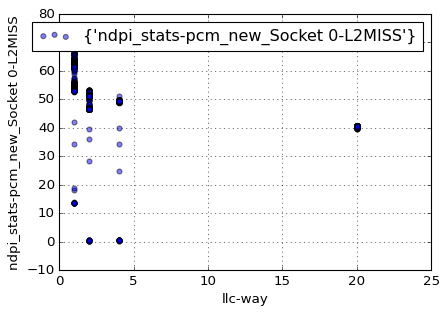

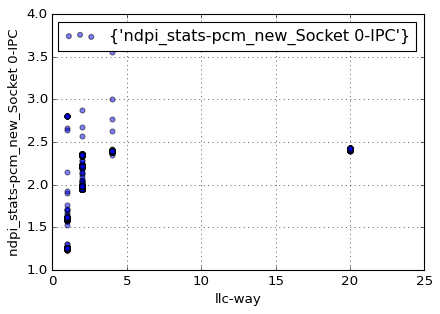

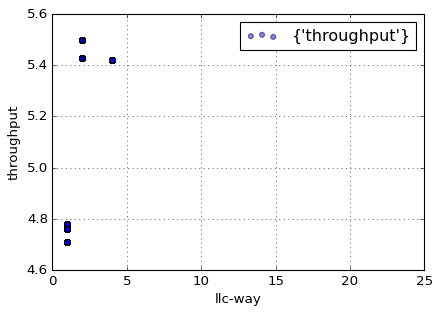

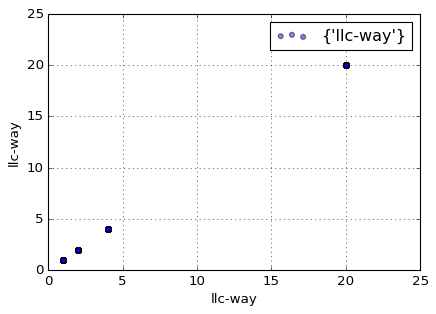

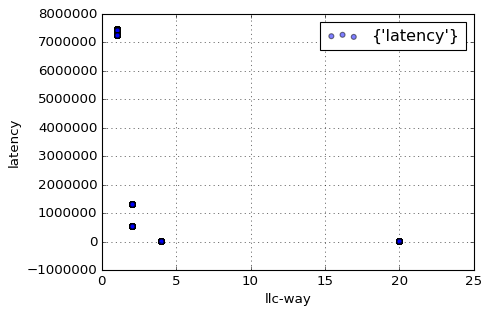

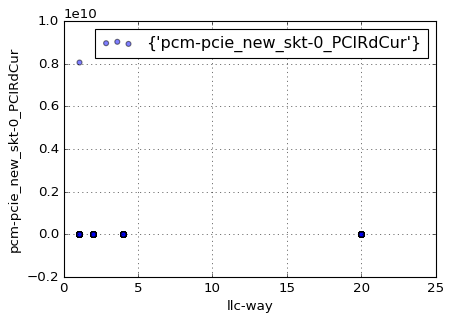

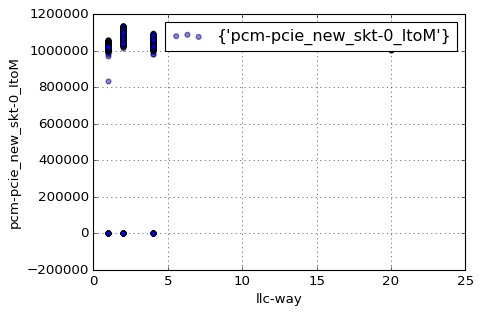

In [30]:
import matplotlib.pyplot as plt

#data['efficiency'] = data.iloc[:, 6]#/ data.iloc[:, 7]
#data['throughput']
efficiency_correlations = data.corr()['llc-way'].sort_values(ascending=False)

high_corr_columns = [(col, efficiency_correlations[col]) for col in efficiency_correlations.index 
                     if abs(efficiency_correlations[col]) > 0 and col != 'llc-way' ]
for col, score in high_corr_columns:
    print(f"correlationship between llc-way and {col}: {score}")

related_colum = ["ndpi_stats-pcm_new_Socket 0-L3HIT",  "ndpi_stats-pcm_new_Socket 0-L3MISS",
                 "ndpi_stats-pcm_new_Socket 0-L2MISS", "ndpi_stats-pcm_new_Socket 0-IPC","throughput",
                 "llc-way","latency","pcm-pcie_new_skt-0_PCIRdCur","pcm-pcie_new_skt-0_ItoM"]

# Plotting
for column in related_colum: 
    fig, ax = plt.subplots(facecolor='white', figsize=(6,4))
    plt.style.use('classic')
    ax.scatter(data['llc-way'], data[column], alpha=0.5,label={column})
    plt.legend()
    plt.xlabel('llc-way')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_32732\1321886519.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations = data.corr()['throughput'].sort_values(ascending=False)


correlation between throughput and ndpi_stats-pcm_new_Proc Energy (Joules)-SKT0: 0.8858781566269863
correlation between throughput and ndpi_stats-pcm_new_Socket 0-IPC: 0.8700368659774185
correlation between throughput and ndpi_stats-pcm_new_Socket 0-PhysIPC%: 0.8699264992200492
correlation between throughput and ndpi_stats-pcm_new_Socket 0-PhysIPC: 0.869858815884552
correlation between throughput and ndpi_stats-pcm_new_Socket 0-INST: 0.8695882971955229
correlation between throughput and ndpi_stats-pcm_new_Socket 0-INSTnom%: 0.8695521221564917
correlation between throughput and ndpi_stats-pcm_new_Socket 0-EXEC: 0.8690929931395818
correlation between throughput and ndpi_stats-pcm_new_Socket 0-INSTnom: 0.8687522325474542
correlation between throughput and ndpi_stats-pcm_new_Socket 0-L3HIT: 0.8471618852673009
correlation between throughput and ndpi_stats-pcm_new_Core3 (Socket 0)-L3HIT: 0.8317682225326394
correlation between throughput and ndpi_stats-pcm_new_Socket 0-L2HIT: 0.81518265532878

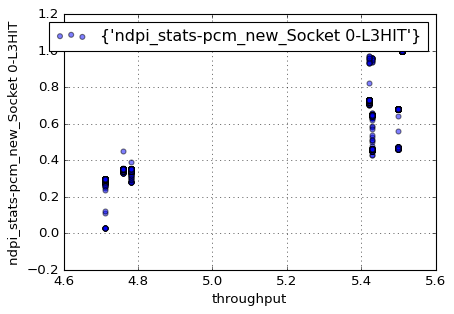

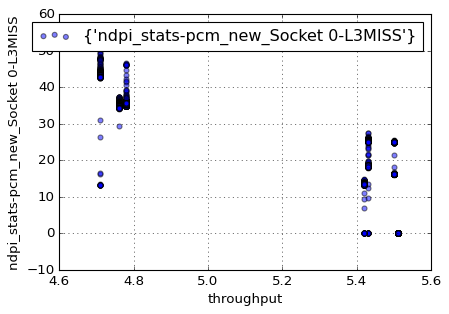

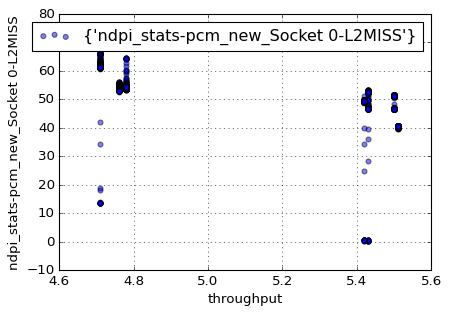

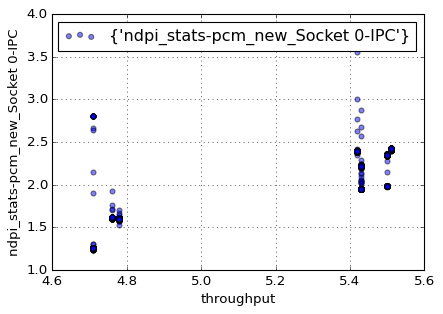

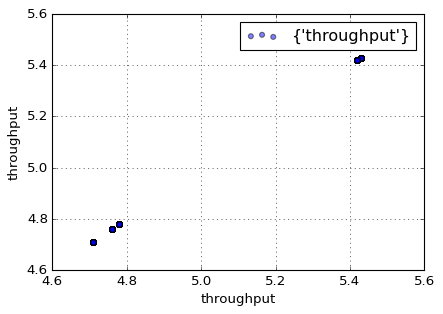

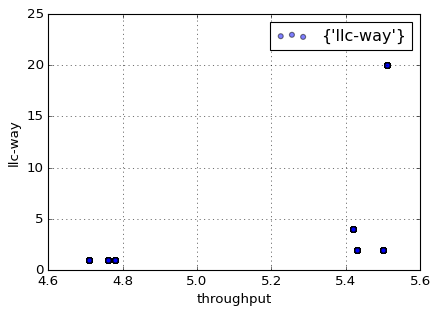

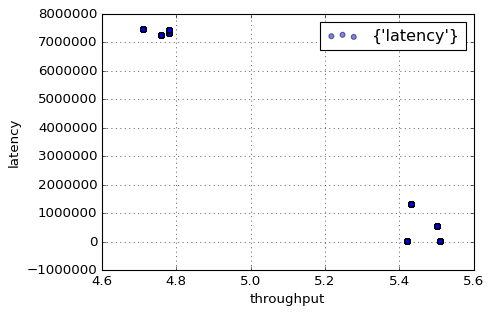

In [31]:
import matplotlib.pyplot as plt

#data['efficiency'] = data.iloc[:, 6]#/ data.iloc[:, 7]
#data['throughput']
efficiency_correlations = data.corr()['throughput'].sort_values(ascending=False)

high_corr_columns = [(col, efficiency_correlations[col]) for col in efficiency_correlations.index 
                     if abs(efficiency_correlations[col]) > 0.6 and col != 'efficiency' and col != 'throughput']
for col, score in high_corr_columns:
    print(f"correlation between throughput and {col}: {score}")

#related_colum = ["ndpi_stats-pcm_new_Socket 0-L3HIT",  "ndpi_stats-pcm_new_Socket 0-IPC","throughput","llc-way"]
related_colum = ["ndpi_stats-pcm_new_Socket 0-L3HIT",  "ndpi_stats-pcm_new_Socket 0-L3MISS",
                 "ndpi_stats-pcm_new_Socket 0-L2MISS", "ndpi_stats-pcm_new_Socket 0-IPC","throughput","llc-way","latency"]
# Plotting
for column in related_colum: 
    fig, ax = plt.subplots(facecolor='white', figsize=(6,4))
    plt.style.use('classic')
    ax.scatter(data['throughput'], data[column], alpha=0.5,label={column})
    plt.xlabel('throughput')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_32732\2784651277.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations = data.corr()['latency'].sort_values(ascending=False)


the correlation between latency and ndpi_stats-pcm_new_Core3 (Socket 0)-L3MPI: 0.8962335301588003
the correlation between latency and ndpi_stats-pcm_new_Socket 0-L3MPI: 0.8938007509466358
the correlation between latency and ndpi_stats-pcm_new_Socket 0-L3MISS: 0.8896441813005768
the correlation between latency and ndpi_stats-pcm_new_Core3 (Socket 0)-L2MPI: 0.8864215012665743
the correlation between latency and ndpi_stats-pcm_new_Core3 (Socket 0)-L3MISS: 0.8726846718493039
the correlation between latency and pcm-pcie_new_skt-0_CRd: 0.8726302733596318
the correlation between latency and pcm-memory_new_SKT0-Ch3Read: 0.8262355267350227
the correlation between latency and ndpi_stats-pcm_new_Socket 0-L2MPI: 0.8224951166729793
the correlation between latency and pcm-memory_new_SKT0-Mem Read (MB/s): 0.7981422944403803
the correlation between latency and pcm-memory_new_System-Read: 0.7981422944403803
the correlation between latency and ndpi_stats-pcm_new_Socket 0-READ: 0.7977637152714486
the cor

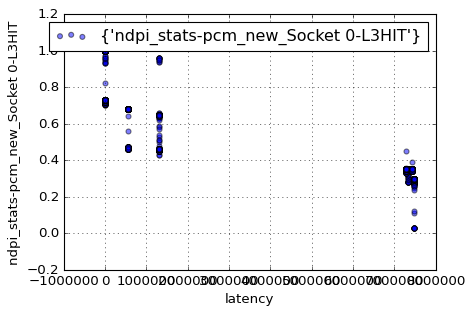

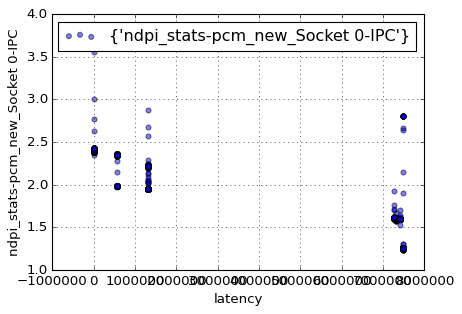

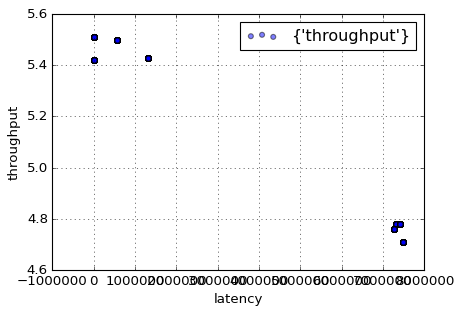

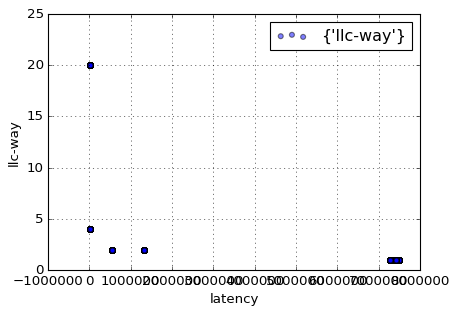

In [32]:
import matplotlib.pyplot as plt

#data['efficiency'] = data.iloc[:, 6]#/ data.iloc[:, 7]
#data['throughput']
efficiency_correlations = data.corr()['latency'].sort_values(ascending=False)

high_corr_columns = [(col, efficiency_correlations[col]) for col in efficiency_correlations.index 
                     if abs(efficiency_correlations[col]) > 0 and col != 'latency' and col != 'latency']
for col, score in high_corr_columns:
    print(f"the correlation between latency and {col}: {score}")

related_colum = ["ndpi_stats-pcm_new_Socket 0-L3HIT",  "ndpi_stats-pcm_new_Socket 0-IPC","throughput","llc-way"]

# Plotting
for column in related_colum: 
    fig, ax = plt.subplots(facecolor='white', figsize=(6,4))
    plt.style.use('classic')
    ax.scatter(data['latency'], data[column], alpha=0.5,label={column})
    plt.xlabel('latency')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

In [80]:
print(data['efficiency'])


Unnamed: 0
0      27.42
1      27.43
2      25.73
3      19.85
4      19.44
       ...  
293     0.03
294     0.04
295     0.03
296     0.03
297     0.03
Name: efficiency, Length: 2384, dtype: float64


In [62]:
import pandas as pd

def average_feature(file_path):
    df = pd.read_csv(file_path)
    averages = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_bool_dtype(df[column]):
            averages[column] = df[column].mean()

    return averages


In [63]:
exp_ls= "0x3"
file_path =  f'..\\datasets\\ONVM-nDPI-stats_{exp_ls}.csv'
a = average_feature(file_path)

In [64]:
file_name = ["0x1","0x10","0x2","0x3","0x6","0xf","0xfffff"]
feature_set = {}
for name in file_name:
    file_path =  f'..\\datasets\\ONVM-nDPI-stats_{name}.csv'
    feature_set[name] = average_feature(file_path)

In [65]:
def extract_specific_data(exp_ls):
    file_path = f'..\\data\\ONVM-nDPI-stats\\{exp_ls}\\traffic_profile.txt'
    
    # Regular expression patterns for required data
    tx_pattern = r"\[Device: id=0\] TX: ([\d.]+)"
    rx_pattern = r"\[Device: id=1\] RX: ([\d.]+)"
    stddev_rx_pattern = r"\[Device: id=1\] RX: [\d.]+ \(StdDev ([\d.]+)\)"  # Adjusted pattern
    average_pattern = r"Average: ([\d.]+) ns"

    # Variables to store the extracted data
    tx_value, rx_value, stddev_rx, average = None, None, None, None

    # Read the text file
    with open(file_path, 'r') as file:
        for line in file:
            if tx_match := re.search(tx_pattern, line):
                tx_value = round(float(tx_match.group(1)), 2)
            elif rx_match := re.search(rx_pattern, line):
                rx_value = round(float(rx_match.group(1)), 2)
            elif stddev_rx_match := re.search(stddev_rx_pattern, line):
                stddev_rx = round(float(stddev_rx_match.group(1)), 2)
            elif average_match := re.search(average_pattern, line):
                average = round(float(average_match.group(1)), 2)

    return tx_value, rx_value, average



# Usage example
data =  extract_specific_data(f'0x10')
print(data)


(5.66, 4.78, 7420799.4)


In [66]:
file_name = ["0x1","0x10","0x2","0x3","0x6","0xf","0xfffff"]
feature_set = {}
for name in file_name:
    file_path =  f'..\\datasets\\ONVM-nDPI-stats_{name}.csv'
    feature_set[name] = average_feature(file_path)

In [67]:
input_set = {}
output_set = {}
latency_set = {}
for name in file_name:
    file_path =  f'..\\datasets\\ONVM-nDPI-stats_{name}.csv'
    input_set[name] = extract_specific_data(name)[0]
    output_set[name] = extract_specific_data(name)[1]
    latency_set[name] = extract_specific_data(name)[2]  

In [68]:
# correlation
print(len(input_set))
print(len(feature_set))

7
7


In [70]:
print(input_set)

{'0x1': 5.63, '0x10': 5.66, '0x2': 5.64, '0x3': 5.65, '0x6': 5.62, '0xf': 5.49, '0xfffff': 5.59}


In [71]:
print(output_set)

{'0x1': 4.78, '0x10': 4.78, '0x2': 4.71, '0x3': 5.43, '0x6': 5.5, '0xf': 5.42, '0xfffff': 5.51}
